# Kolmogorov-Smirnov Test and Lilliefors Test

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform
from tqdm import tqdm
import statsmodels.api as sm
import random
import warnings
warnings.filterwarnings('ignore')

# Contents of this note
## 1. CDF and ECDF
## 2. Glivenko–Cantelli Theorem
## 3. Kolmogorov Theorem
## 4. Performing goodness of fit test with Uniform null hypothesis (KS test)
## 5. Performing goodness of fit test with Normal null hypothesis  (from KS test to Lilliefors test)

# Part 1 - CDF and ECDF
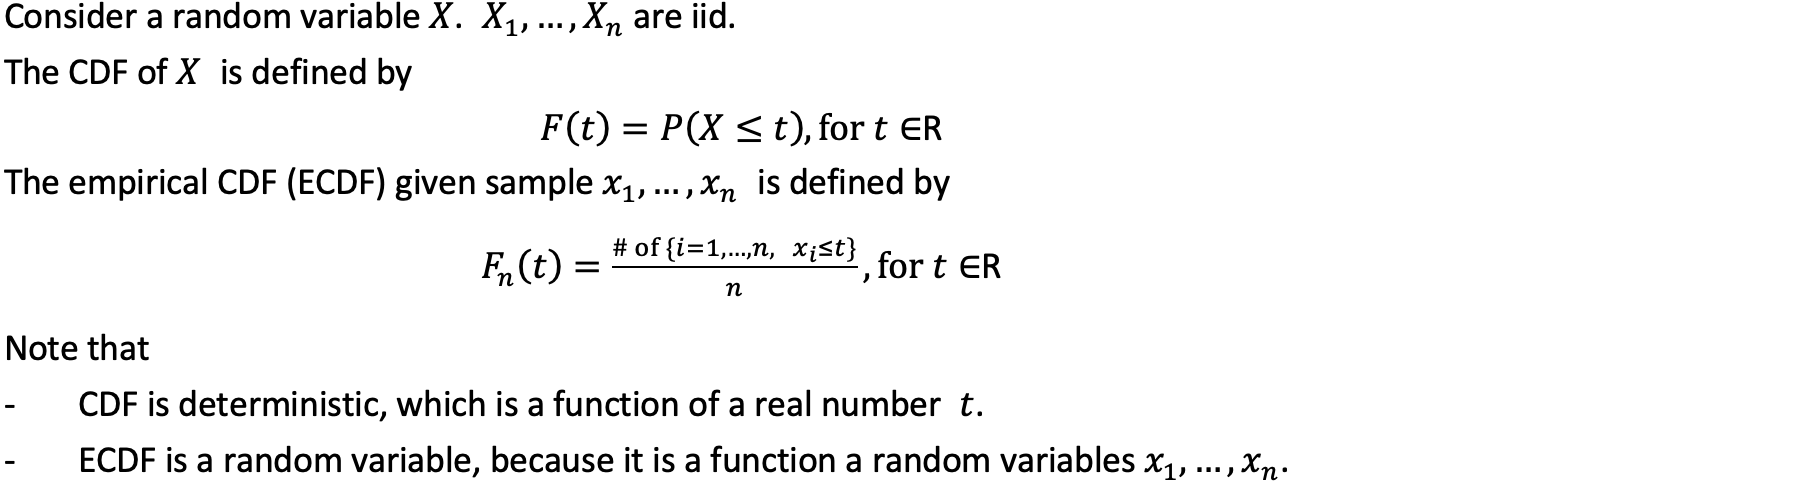

In [2]:
### "x" is evenly spaced numbers over a specified interval [a,b], the plot will be created in [a,b].
### "sample" is the random sample for which ECDF is calculated

def ecdf(x,sample):
    sample = np.sort(sample)
    n      = len(x)
    ecdf   = [np.nan]*len(x)
    for i in range(n):
        ecdf[i] = np.sum(sample<=x[i])/len(sample)
    return ecdf

# Part 2 - [Glivenko–Cantelli Theorem](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem)
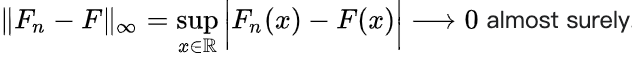


### Simulation of Glivenko–Cantelli Theorem
- #### The following codes create the CDF and ECDF plots with different sample sizes. 
- #### As can be seen, when the sample sizes increases, the ECDF plots are getting closer to the actual CDF. 

## Example 1: Normal distribution: N(10,5)

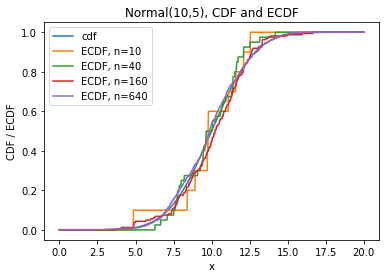

In [3]:
mu     = 10
sigma  = np.sqrt(5)
x      = np.linspace(0,20,1000)

##### Calculate the CDF and ECDF(with different sample size)
sample_size_list = [10,40,160,640]
cdf_ecdf_data    = pd.DataFrame(columns=['x']+['cdf']) 
cdf_ecdf_data.loc[:,'x']   = x
cdf_ecdf_data.loc[:,'cdf'] = norm.cdf(x, loc=mu, scale=sigma)
for ss in sample_size_list:
    sample = np.random.normal(mu,sigma,ss)
    cdf_ecdf_data.loc[:,'ecdf_'+str(ss)] = ecdf(x,sample)

##### Plotting the CDF and ECDF curves  
sns.lineplot(data=cdf_ecdf_data,x='x',y='cdf',label = 'cdf').set(ylabel='CDF / ECDF')
for ss in sample_size_list:
    col_now   = 'ecdf_'+ str(ss)
    label_now = 'ECDF, n=' + str(ss) 
    sns.lineplot(data=cdf_ecdf_data,x='x',y=col_now,label = label_now)
    plt.title('Normal(10,5), CDF and ECDF')
plt.show()    

## Example 2: Exponential distribution: Exp(4)

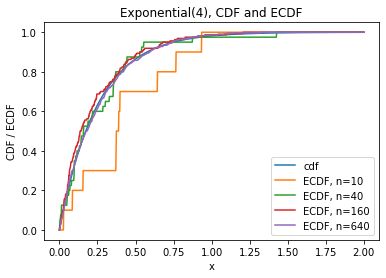

In [4]:
Lambda = 4
x      = np.linspace(0,2,1000)

##### Calculate the CDF and ECDF(with different sample size)
sample_size_list = [10,40,160,640]
cdf_ecdf_data    = pd.DataFrame(columns=['x']+['cdf']) 
cdf_ecdf_data.loc[:,'x']   = x
cdf_ecdf_data.loc[:,'cdf'] = expon.cdf(x,scale=1/Lambda)
for ss in sample_size_list:
    sample = np.random.exponential(1/Lambda,ss)
    cdf_ecdf_data.loc[:,'ecdf_'+str(ss)] = ecdf(x,sample)

##### Plotting the CDF and ECDF curves  
sns.lineplot(data=cdf_ecdf_data,x='x',y='cdf',label = 'cdf').set(ylabel='CDF / ECDF')
for ss in sample_size_list:
    col_now   = 'ecdf_'+ str(ss)
    label_now = 'ECDF, n=' + str(ss) 
    sns.lineplot(data=cdf_ecdf_data,x='x',y=col_now,label = label_now)
    plt.title('Exponential(4), CDF and ECDF')
plt.show()    

## Example 3: Uniform distribution: U[2,5]

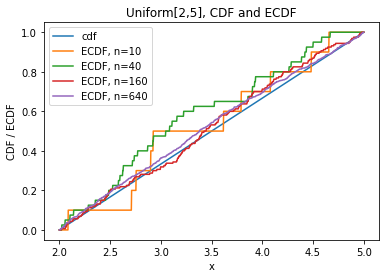

In [5]:
a = 2
b = 5 
x = np.linspace(2,5,1000)

##### Calculate the CDF and ECDF(with different sample size)
sample_size_list = [10,40,160,640]
cdf_ecdf_data    = pd.DataFrame(columns=['x']+['cdf']) 
cdf_ecdf_data.loc[:,'x']   = x
cdf_ecdf_data.loc[:,'cdf'] = uniform.cdf(x, loc=a, scale=b-a)
for ss in sample_size_list:
    sample = np.random.uniform(a,b,ss)
    cdf_ecdf_data.loc[:,'ecdf_'+str(ss)] = ecdf(x,sample)

##### Plotting the CDF and ECDF curves  
sns.lineplot(data=cdf_ecdf_data,x='x',y='cdf',label = 'cdf').set(ylabel='CDF / ECDF')
for ss in sample_size_list:
    col_now   = 'ecdf_'+ str(ss)
    label_now = 'ECDF, n=' + str(ss) 
    sns.lineplot(data=cdf_ecdf_data,x='x',y=col_now,label = label_now)
    plt.title('Uniform[2,5], CDF and ECDF')
plt.show()    

# Part 3 - Kolmogorov Theorem
### [Relationship between Kolmogorov–Smirnov statistic, Glivenko–Cantelli theorem, and Donsker's theorem is discussed here](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#One-sample_Kolmogorov%E2%80%93Smirnov_statistic).


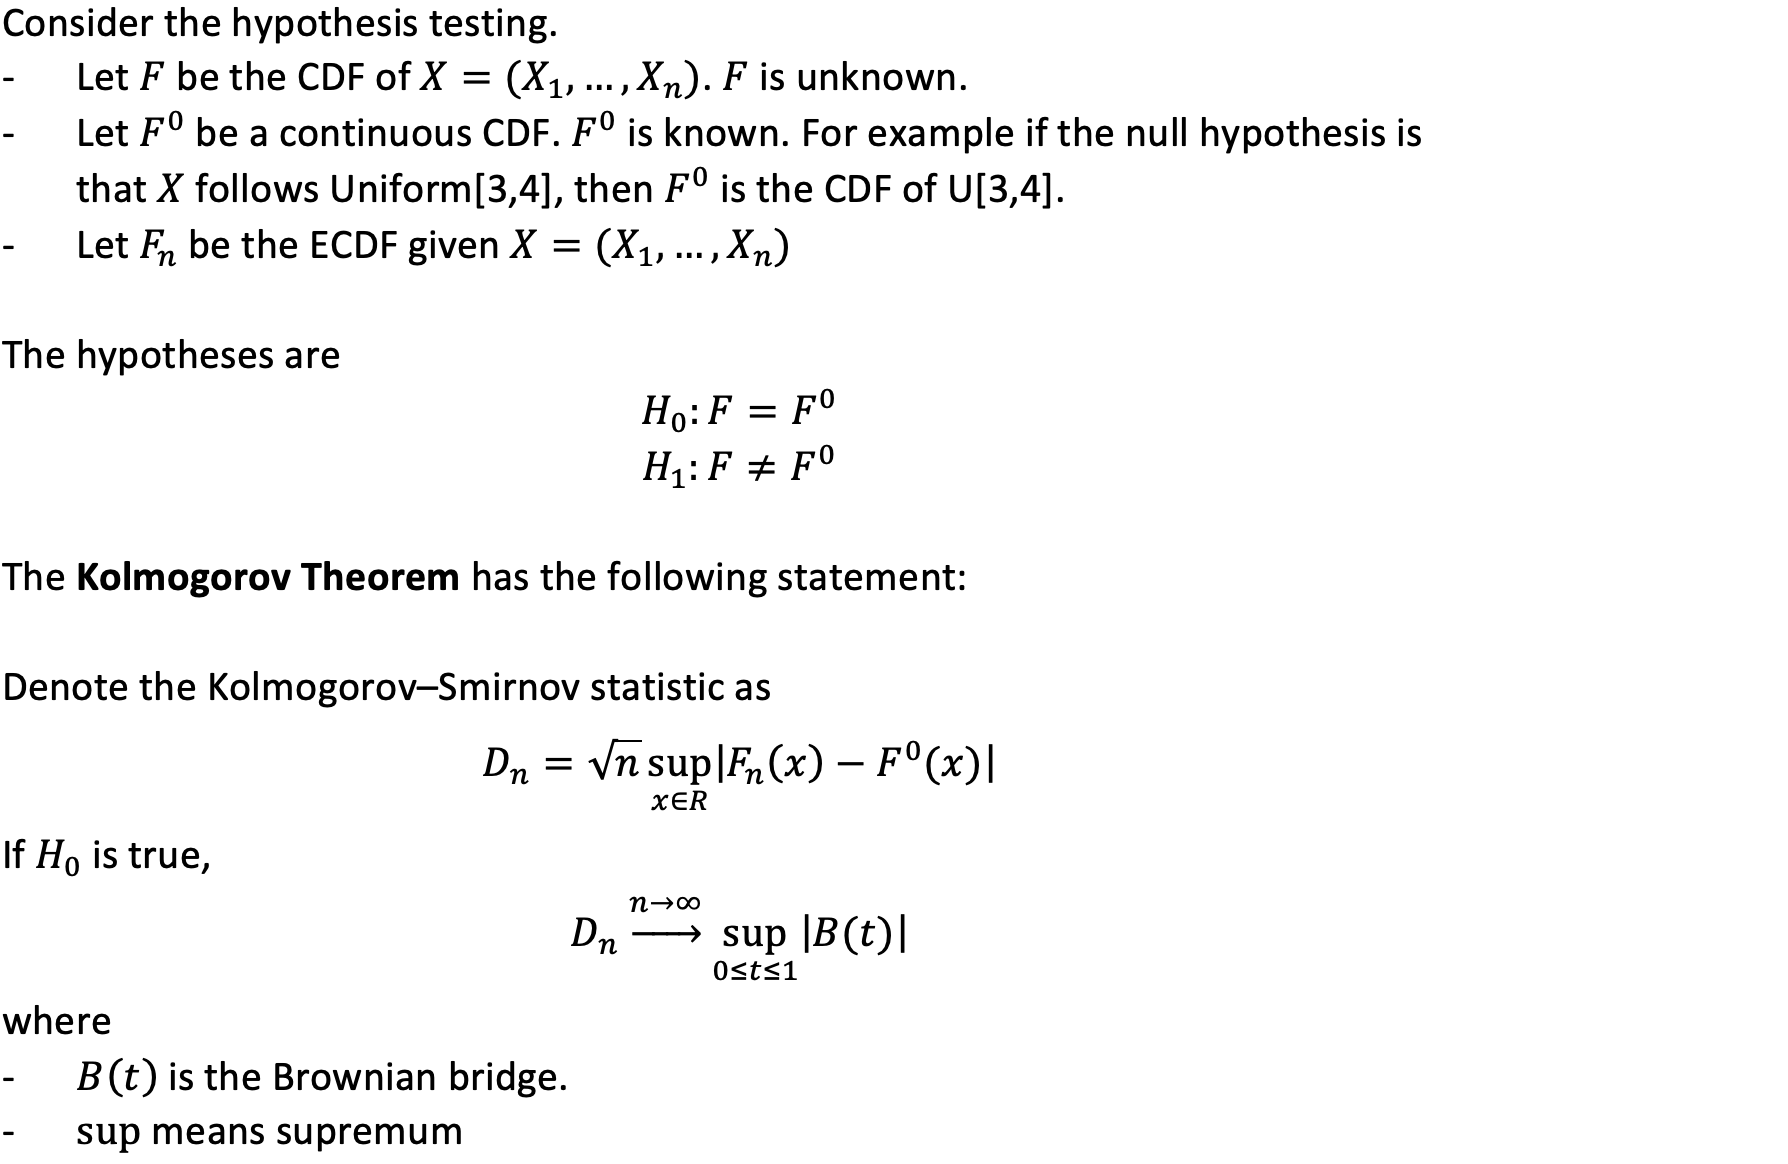

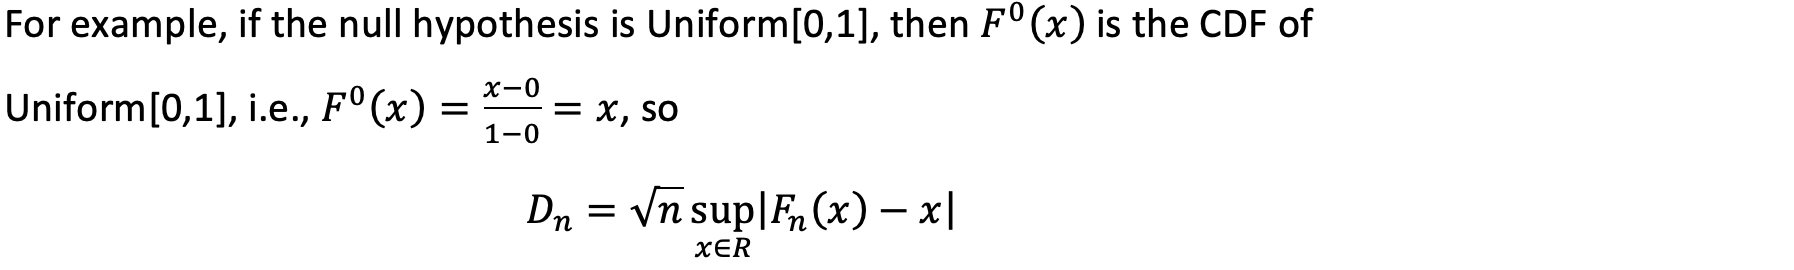

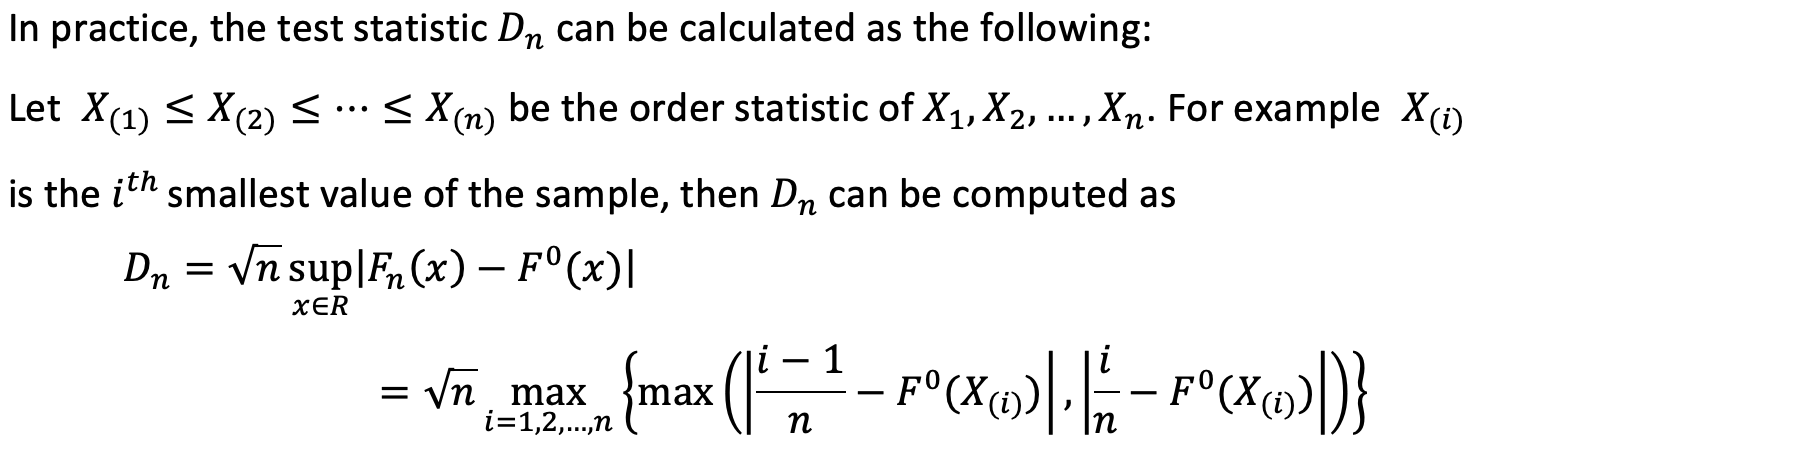

# Part 4 - Performing Kolmogorov–Smirnov test with Uniform null hypothesis

### The scipy.stats.kstest performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit. The details about p-values are shown below.
[API Reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

[Source Code](https://github.com/scipy/scipy/blob/v1.11.2/scipy/stats/_stats_py.py#L8907-L9081)

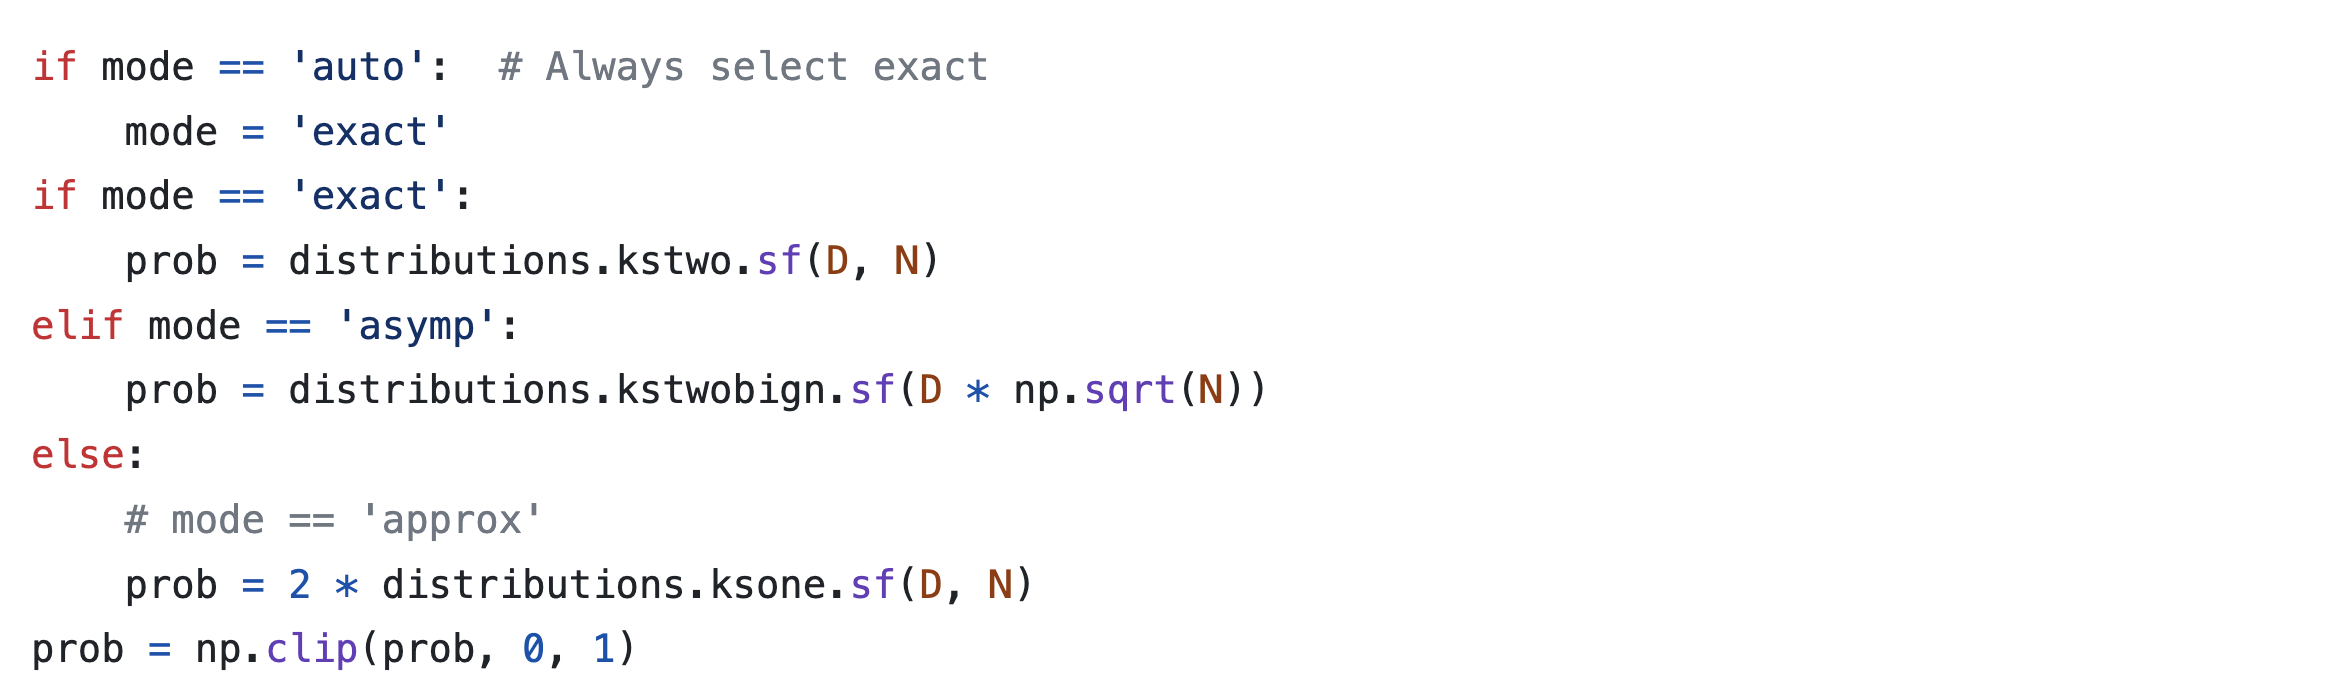

### Here, we used the following codes to perform the KS test in this study. 
- #### The test statistic and p-values are same with the scipy.stats.kstest() function above. 
- #### The "auto"/"exact" method in scipy.stats.kstest() is used for calculating p-value. 
- #### The following codes calculate the test statistic and p-value for hypothesis tests below. The bound parameters are pre-specified. 
- #### Note that these functions are specifically for the test with uniform null distribution, as the test statistics use the CDF of uniform distribution. 

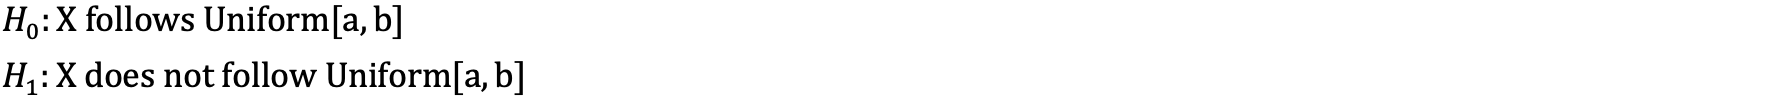

In [6]:
def CDF_uniform(a,b,x):
    return (x-a)/(b-a)
def Tn_uniform(sample):
    sorted_sample = np.sort(sample)
    n = len(sorted_sample)
    calc_df = pd.DataFrame(columns=['i'])
    for i in range(n):
        calc_df.loc[i,'i']=i+1
        calc_df.loc[i,'i_minus_1_over_n'] = (i+1-1)/n
        calc_df.loc[i,'i_over_n'] = (i+1)/n
        calc_df.loc[i,'F0_x_i']   = CDF_uniform(0,1,sorted_sample[i])
        calc_df.loc[i,'dif_1']    = abs(calc_df.loc[i,'i_minus_1_over_n']-calc_df.loc[i,'F0_x_i'])
        calc_df.loc[i,'dif_2']    = abs(calc_df.loc[i,'i_over_n']-calc_df.loc[i,'F0_x_i'])
        calc_df.loc[i,'max_dif']  = max(calc_df.loc[i,'dif_1'],calc_df.loc[i,'dif_2'])
    return(calc_df['max_dif'].max())

##### ks_test_uniform(sample) and stats.kstest(sample,stats.uniform.cdf,args=(0,1)) give rise to same results
def ks_test_uniform(sample):
    ts = Tn_uniform(sample)
    p  = stats.kstwo.sf(ts,len(sample))
    return(ts, p)

**Checking**
- In this example, the real distribution is N(0.5,0.05)
- The null hypothesis is U[0,1]
- The two functions **ks_test_uniform( )** and **stats.kstest( )** return the same results 
- Going forward will use **ks_test_uniform( )**

In [7]:
##### the true distribution is N(0.5,0.05)
sample = np.random.normal(0.5,0.05,50)

In [8]:
##### using the function ks_test_uniform() defined above
ks_test_uniform(sample)

(0.3995043130335344, 1.0297314111321024e-07)

In [9]:
##### using the function kstest() in stats
stats.kstest(sample,stats.uniform.cdf,args=(0,1))

KstestResult(statistic=0.3995043130335344, pvalue=1.0297314111321024e-07)

### The following function performs an experiment of KS test. The key parameters are
- ### (1) sample size 
- ### (2) true distribution for data generation. 

In [10]:
def ks_experiment(sample_size,n_experiment,true_dist):
    population_size            = 100000
    population_uniform         = np.random.uniform(0,1,population_size)
    population_normal          = np.random.normal(0.5,0.05,population_size)
    ##### sub-population within the support of the null distribution [0,1]
    population_normal_new      = population_normal[(population_normal>0)&(population_normal<1)]
    
    population_exponential     = np.random.exponential(1/5,population_size)
    ##### sub-population within the support of the null distribution [0,1]
    population_exponential_new = population_exponential[(population_exponential>0)&(population_exponential<1)]
    
    results = pd.DataFrame(columns=['experiment'])
    for e in range(n_experiment):
        results.loc[e,'experiment']=e+1
        if true_dist=='uniform': 
            sample = np.random.choice(population_uniform,sample_size)
            results.loc[e,'h0'] = 'True'
        if true_dist=='normal': 
            sample = np.random.choice(population_normal_new,sample_size)
            results.loc[e,'h0'] = 'False'
        if true_dist=='exponential': 
            sample = np.random.choice(population_exponential_new,sample_size)
            results.loc[e,'h0'] = 'False'
        ts, p = ks_test_uniform(sample)

        results.loc[e,'ts'] = ts
        results.loc[e,'p']  = p
        results.loc[e,'reject'] = int(p<0.05)
        
    if true_dist=='uniform':
        results['error'] = results['reject']
    else:
        results['error'] = 1-results['reject']
        
    results['sample_size'] =  sample_size
    return results

### We test the null hypothesis that a random variable follows the unifrom distribution Uniform[0,1]. 
- #### If the "true_distribution" is same with the H0, i.e., U[0,1], then the null hypothesis is true, otherwise it is false. 

- #### Consider the following distributions to create continuous random variable in support [0,1]:
  - #### Uniform [0,1]
  - #### Normal (0.5,0.05)
  - #### Exponential (5)
- #### If the sample contains values that are discrete or beyond [0,1], there is no need to conduct any statistical hypothesis testing and we can directly reject the H0. 
- #### The following codes and plot show the three distributions. 

In [11]:
##### This function create a histogram plot of the generated data sample. Data needs to be an array
def show_generated_data(data):
    mean = round(data.mean(),4)
    var  = round(data.var(),4)
    print('Mean:'+str(mean))
    print('Variance:'+str(var))
    
    plt.figure(figsize=(5,4))
    plt.hist(data,bins=20)
    plt.show()

Mean:0.9857
Variance:0.3301


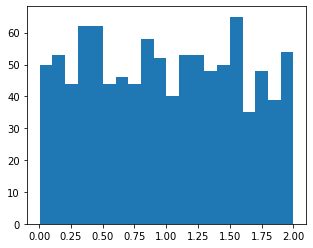

In [12]:
##### Uniform(0,1)
a = 0
b = 2
size = 1000
data = np.random.uniform(a,b,size) 
show_generated_data(data)

Mean:0.5097
Variance:0.0493


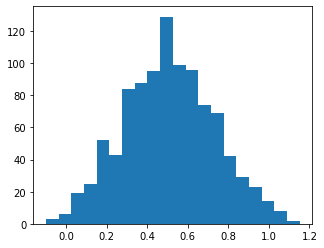

In [13]:
##### Normal(0.5,0.05)
mu             = 0.5
sigma_squared  = 0.05
size           = 1000
data = np.random.normal(loc=mu,scale=np.sqrt(sigma_squared),size=size) 
show_generated_data(data)

Mean:0.1965
Variance:0.0362


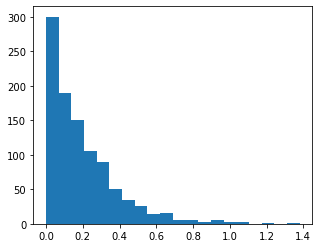

In [14]:
##### Exponential(5)
Lambda = 5
size   = 1000
data   = np.random.exponential(1/Lambda,size)
## data= np.random.exponential(scale=1/Lambda,size=size)
show_generated_data(data)

### Case 1
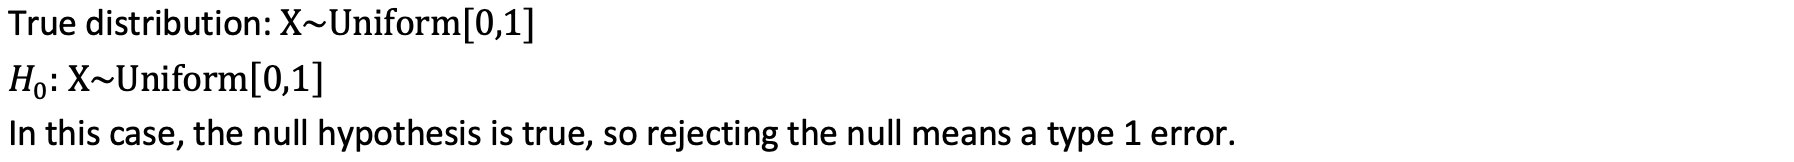

In [15]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in sample_size_list:
    result_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='uniform')
    if ss==sample_size_list[0]:
        results = result_now
    else:
        results = pd.concat([results,result_now],axis=0)
results.groupby(['sample_size'])['error'].mean().reset_index().rename(columns={'error':'Type 1 Error'})

,sample_size,Type 1 Error
0,10,0.04
1,20,0.06
2,50,0.01
3,100,0.00
4,200,0.05


**The Type 1 Error rate are around 5% in all cases.**

### Case 2
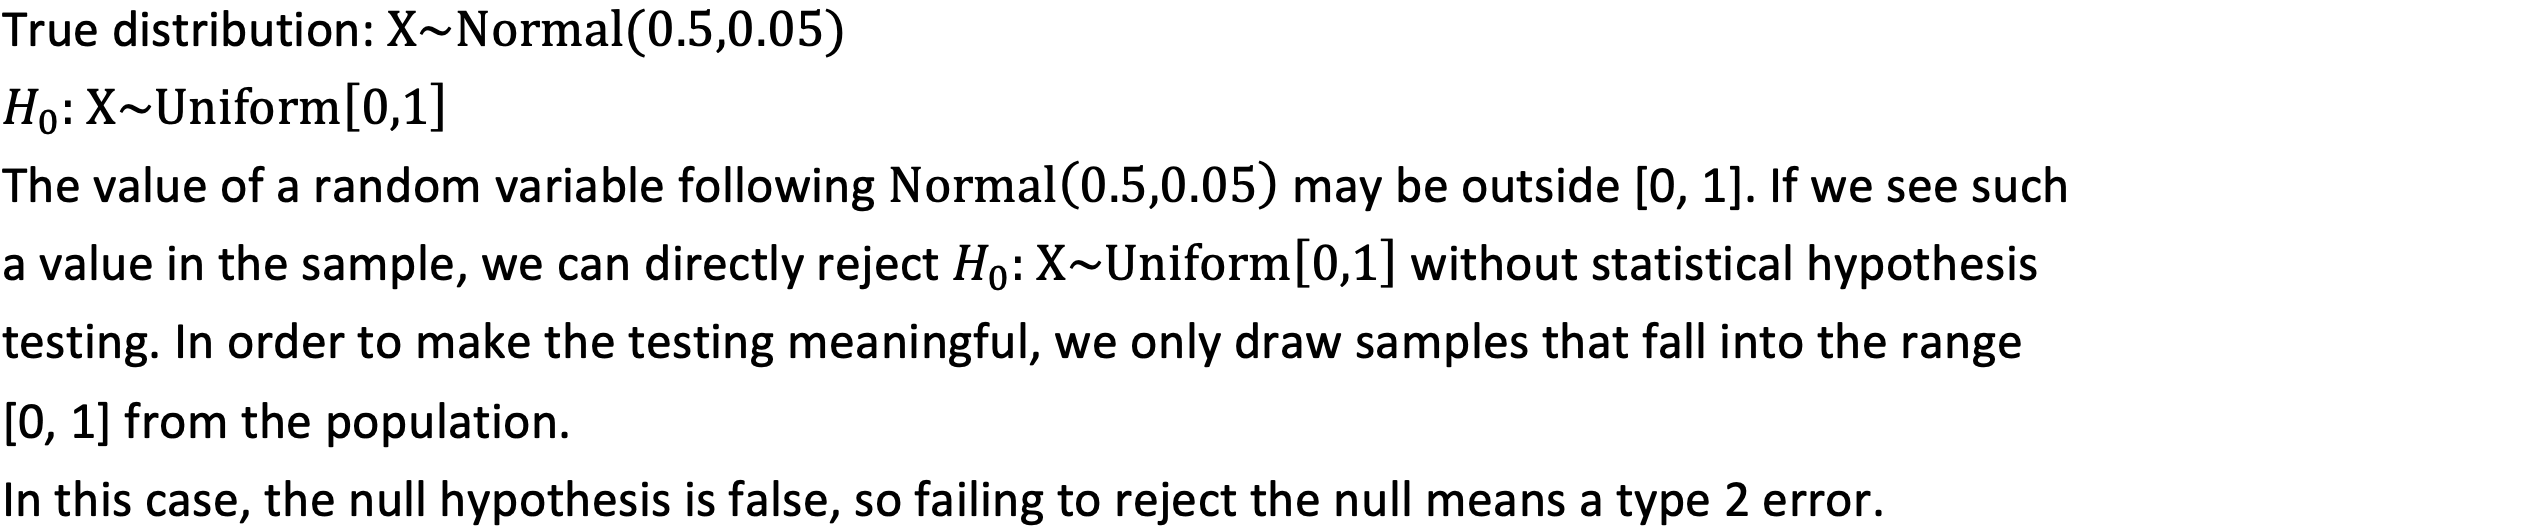

In [16]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in sample_size_list:
    result_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='normal')
    if ss==sample_size_list[0]:
        results = result_now
    else:
        results = pd.concat([results,result_now],axis=0)
results.groupby(['sample_size'])['error'].mean().reset_index().rename(columns={'error':'Type 2 Error'})

,sample_size,Type 2 Error
0,10,0.1
1,20,0.0
2,50,0.0
3,100,0.0
4,200,0.0


**The Type 2 Error rate are close to zero in all cases except when the sample size is 10.**

### Case 3
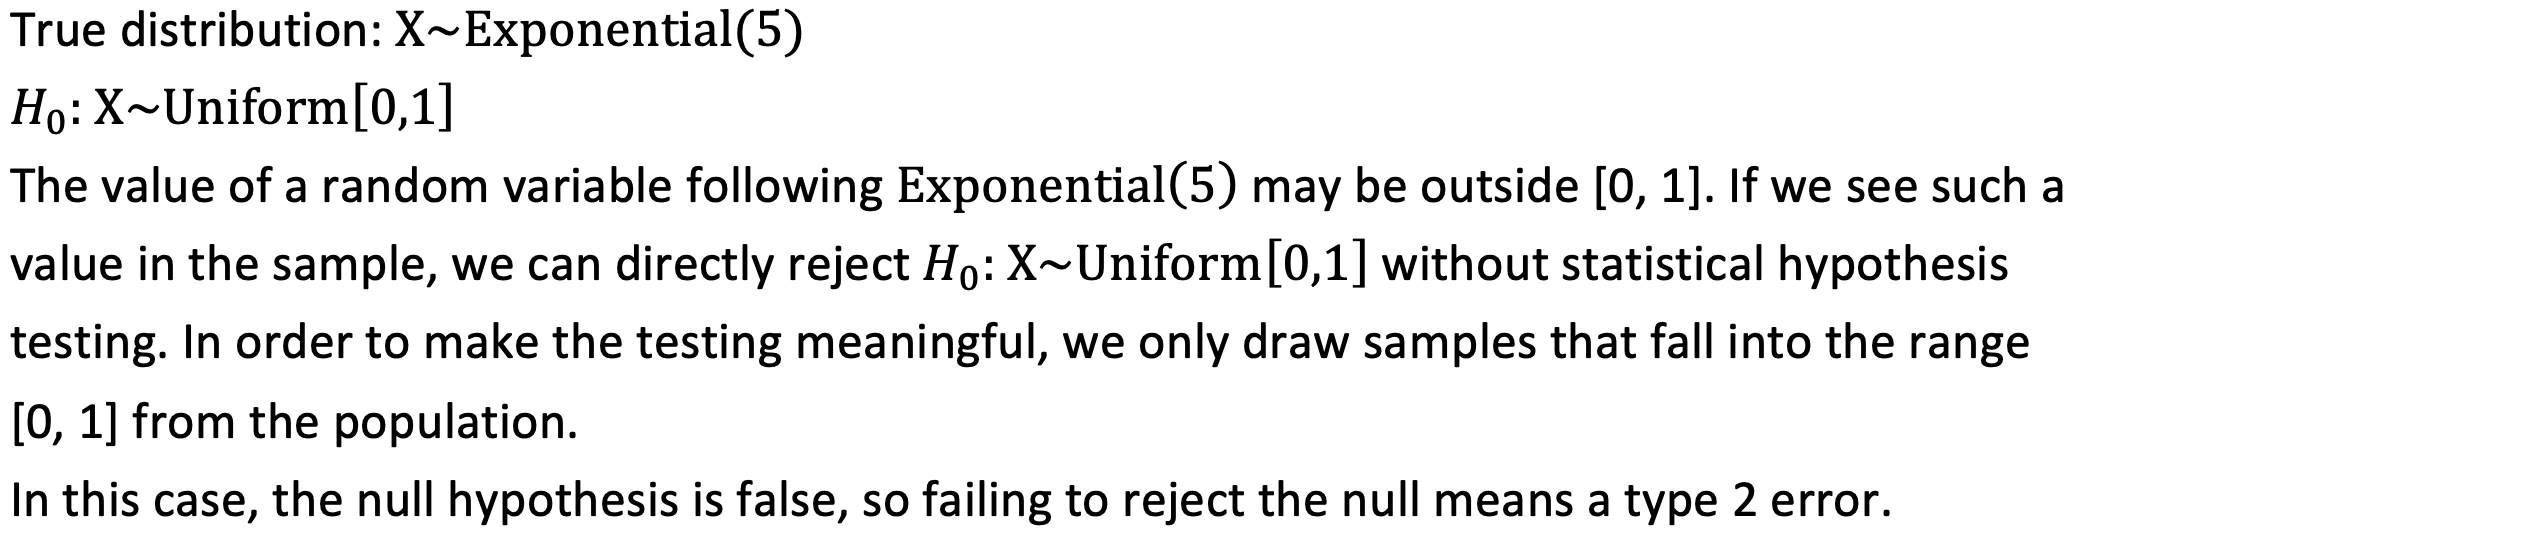

In [17]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in sample_size_list:
    result_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='exponential')
    if ss==sample_size_list[0]:
        results = result_now
    else:
        results = pd.concat([results,result_now],axis=0)
results.groupby(['sample_size'])['error'].mean().reset_index().rename(columns={'error':'Type 2 Error'})

,sample_size,Type 2 Error
0,10,0.03
1,20,0.00
2,50,0.00
3,100,0.00
4,200,0.00


**The Type 2 Error rate are close to zero in all cases except when the sample size is 10.**

# Part 5 - Performing goodness of fit test with Normal null hypothesis (from KS test to Lilliefors test)
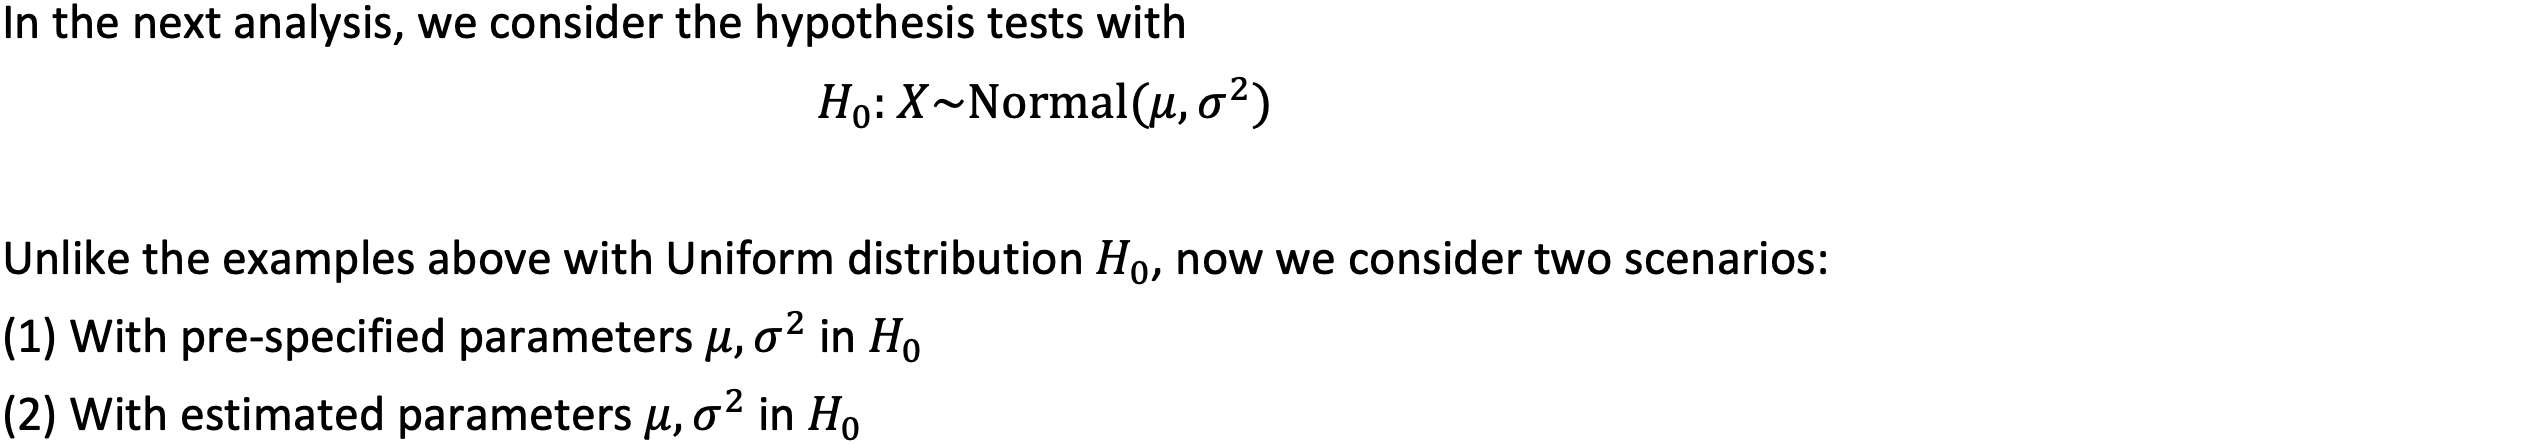

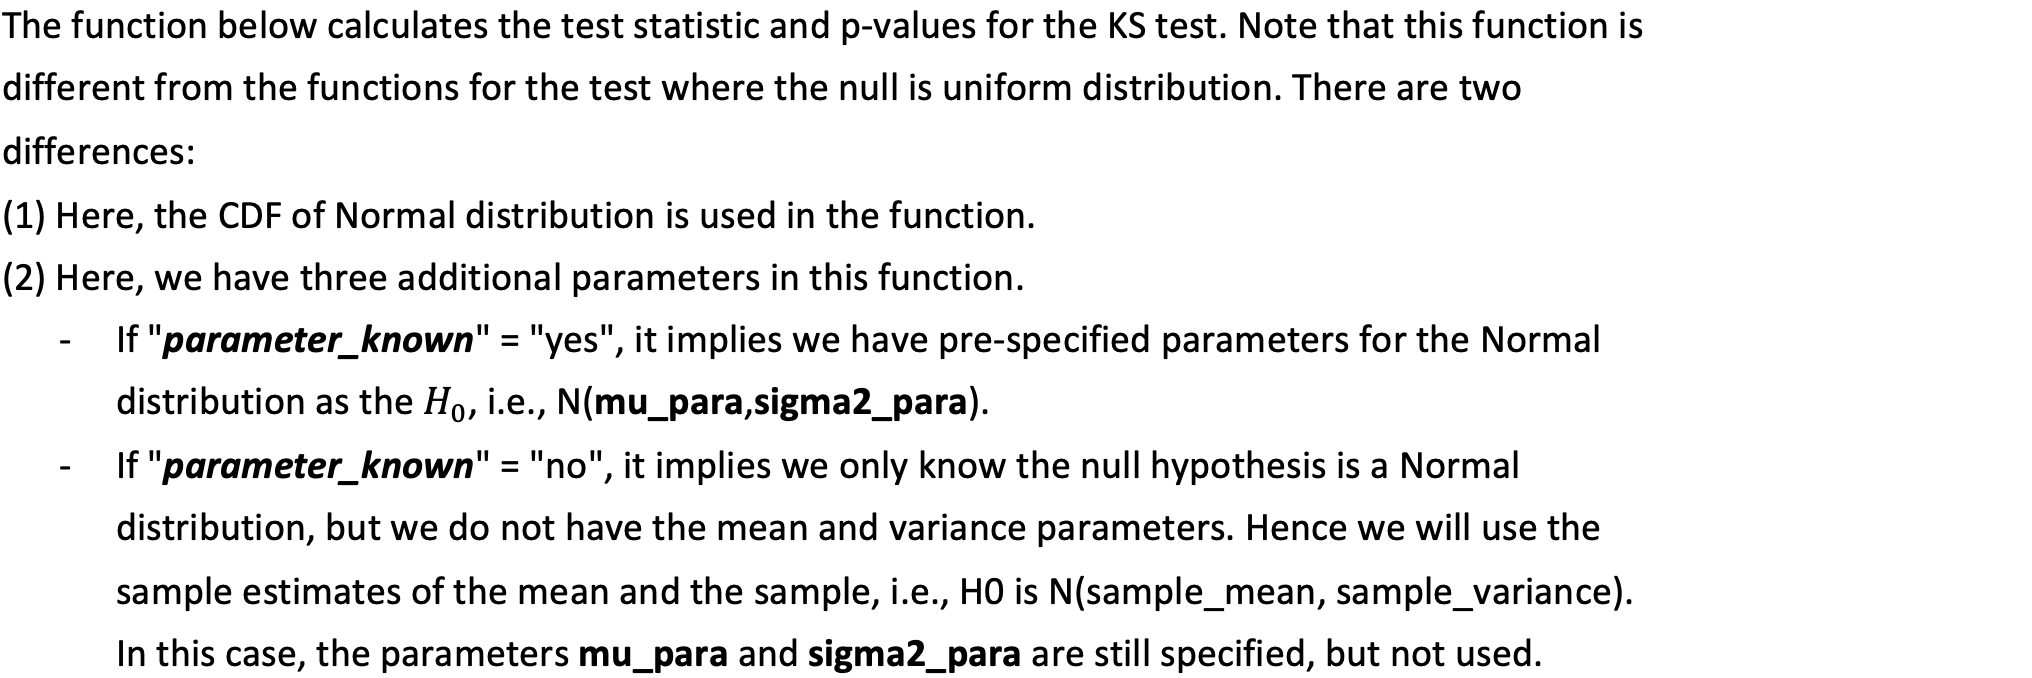

In [18]:
def Tn_normal(sample,mu_para,sigma2_para,parameter_known):
    sorted_sample = np.sort(sample)
    n = len(sorted_sample)
    calc_df = pd.DataFrame(columns=['i'])
    
    if parameter_known == 'yes':
        mu_use     = mu_para
        sigma2_use = sigma2_para
    else:
        mu_use     = sample.mean() 
        sigma2_use = sample.var(ddof=1)
    for i in range(n):
        calc_df.loc[i,'i']=i+1
        calc_df.loc[i,'i_minus_1_over_n'] = (i+1-1)/n
        calc_df.loc[i,'i_over_n'] = (i+1)/n
        calc_df.loc[i,'F0_x_i']   = norm.cdf(sorted_sample[i], loc=mu_use, scale=np.sqrt(sigma2_use))
        calc_df.loc[i,'dif_1']    = abs(calc_df.loc[i,'i_minus_1_over_n']-calc_df.loc[i,'F0_x_i'])
        calc_df.loc[i,'dif_2']    = abs(calc_df.loc[i,'i_over_n']-calc_df.loc[i,'F0_x_i'])
        calc_df.loc[i,'max_dif']  = max(calc_df.loc[i,'dif_1'],calc_df.loc[i,'dif_2'])
    return(calc_df['max_dif'].max())

##### ks_test_norm(sample) and stats.kstest(sample,stats.norm.cdf,args=(3,1)) give rise to same results
def ks_test_normal(sample,mu_para,sigma2_para,parameter_known):
    ts = Tn_normal(sample,mu_para,sigma2_para,parameter_known)
    p  = stats.kstwo.sf(ts,len(sample))
    return(ts, p)

#### If "parameter_known" = "yes", the ks_test_normal() function create the same resutl as the function [scipy.stats.kstest( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html).

#### However, if "parameter_known" = "no", the results (both test statistics and p-values) are different. 
### Consider the following examples. 
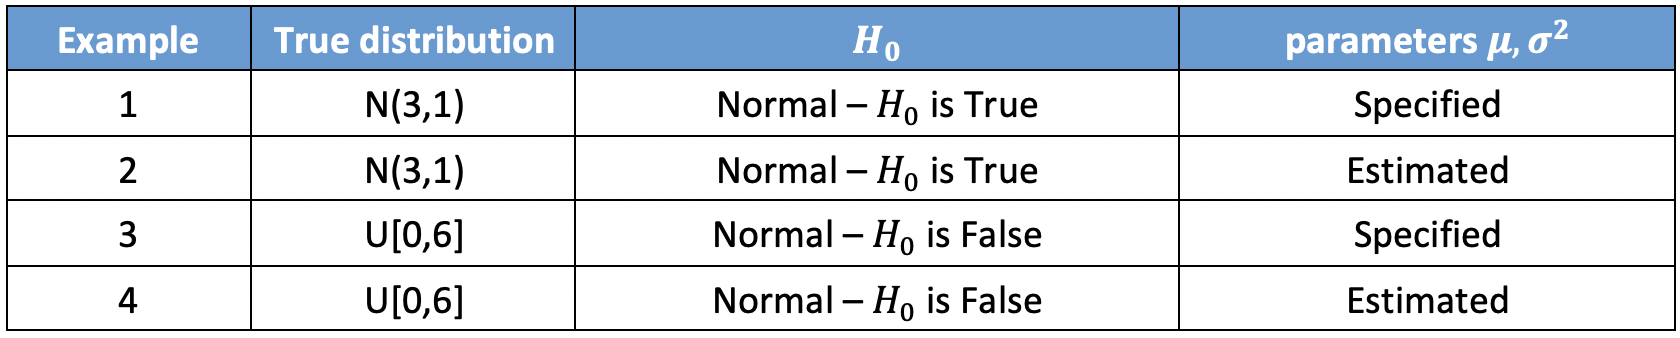
As shown, 
#### - In Examples 1 and 3 where we have pre-specified parameters in the Normal distribution in H0, the two functions give the same resutls, and the test conclusions are correct.
#### - In Example 2 when the null is true (which is unknown), the stats.kstest() that uses pre-specified parameters and the ks_test_normal() that used sample estimates of the parameters give different test statistics and p-values, and both tests have large p-values.
#### - In Example 4, when the null is false (which is unknown) and the parameters in the null distribution is also unknown, the stats.kstest() that uses pre-specified parameters and the ks_test_normal() that used sample estimates of the parameters give different test statistics and p-values. The ks_test_normal() function fails to reject this null. 

### Example (1)
#### - The true underlying distribution is N(3,1), i.e., the null hypothesis is true. 
#### - Use "parameter_known" = "yes".

In [19]:
sample  = np.random.normal(3,1,50)
compare = pd.DataFrame(columns=['function','ts','p'])
compare['function'] = ['stats.kstest','ks_test_normal']
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[1,['ts','p']] = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='yes')
compare

,function,ts,p
0,stats.kstest,0.121928,0.413996
1,ks_test_normal,0.121928,0.413996


- **ks_test_normal( ) defined above and the [kstest( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) create the same result**
- **The null hypothesis (True) is not rejected.**

### Example (2): 
#### - The true underlying distribution is N(3,1), i.e., the null hypothesis is True. 
#### - Use "parameter_known" = "no". 

In [20]:
sample  = np.random.normal(3,1,50)
compare = pd.DataFrame(columns=['function','ts','p'])
compare['function']       = ['stats.kstest','ks_test_normal']
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[1,['ts','p']] = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='no')
compare

,function,ts,p
0,stats.kstest,0.109017,0.555293
1,ks_test_normal,0.100009,0.662199


- **ks_test_normal( ) defined above and the [kstest( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) create different result**
- **Both methods yield relatively large p-values, indicating a failure to reject the null hypothesis (True)**

### Example (3):  
#### - The true underlying distribution is U(0,6), i.e., the null hypothesis is False. 
#### - Use "parameter_known" = "yes". 

In [21]:
sample  = np.random.uniform(0,6,50)
compare = pd.DataFrame(columns=['function','ts','p'])
compare['function'] = ['stats.kstest','ks_test_normal']
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[1,['ts','p']] = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='yes')
compare

,function,ts,p
0,stats.kstest,0.2141,0.017212
1,ks_test_normal,0.2141,0.017212


- **ks_test_normal( ) defined above and the [kstest( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) create the same result**
- **The null hypothesis (True) is rejected.**

### Example (4):  
#### - The true underlying distribution is U(0,6), i.e., the null hypothesis is False. 
#### - Use "parameter_known" = "no". 

In [22]:
sample  = np.random.uniform(0,6,50)
compare = pd.DataFrame(columns=['function','ts','p'])
compare['function'] = ['stats.kstest','ks_test_normal']
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[1,['ts','p']] = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='no')
compare

,function,ts,p
0,stats.kstest,0.269702,0.001056
1,ks_test_normal,0.084897,0.833989


- **ks_test_normal( ) defined above and the [kstest( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) create different result**
- **[kstest( )](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) rejects the null hypothesis (False), while ks_test_normal( ) fails to reject the null.**

**In Example (3) and (4)**
- **The null hypothesis is Normal while the true distribution is Uniform.**
- **Example (3) used pre-specified parameters, the test correctly rejected the false null hypothesis.**
- **Example (4) used estimated parameters based on the sample, the test failed to reject the false null hypothesis.**

**In the codes below, we create three samples**
- **sample_true**: a random sample containing observations following **U[0,6]**.
- **sample_h0_specified**: a random sample containing observations following **N[3,1]**. 
- **sample_h0_estimate**: a random sample containing observations following **N[mu_sample,sigma2_sample]**, where  mu_sample,sigma2_sample are estimated using the data in sample_true.
- **sample_true** is an observed sample. The other two samples are hypothetical. That is why in sample_h0_estimate the para_mu and para_sigma2 are estimated using **sample_true**.
- Histogtam and [QQ plots](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) are created to compare the sample distributions. 

In [23]:
from statsmodels.graphics.gofplots import qqplot_2samples
size=100
sample_true         = np.random.uniform(0,6,size)
sample_h0_specified = np.random.normal(3,1,size)
sample_h0_estimate  = np.random.normal(sample_true.mean(),np.sqrt(sample_true.var(ddof=1)),size)

**Uniform (0,6) vs Normal (3,1)**

**In this case, the histogram and QQ-plot indicate that two distributons are quite different.**

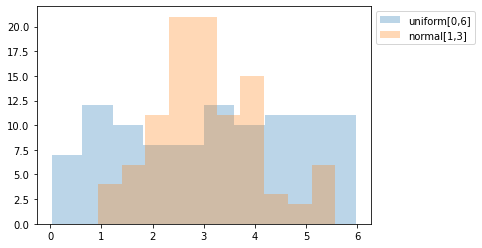

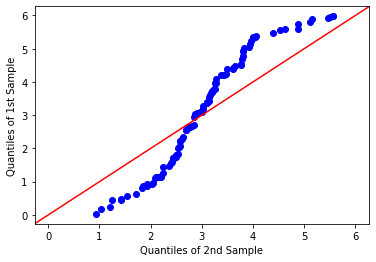

In [24]:
plt.hist(sample_true,alpha=0.3,label='uniform[0,6]')
plt.hist(sample_h0_specified,alpha=0.3,label='normal[1,3]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
pp_x = sm.ProbPlot(sample_true)
pp_y = sm.ProbPlot(sample_h0_specified)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

**Uniform (0,6) vs Normal (sample_mean, sample_variance)**

**In this case, the differences between the two distributions, according to the histogram and the QQ plot, are smaller than the previous case.**

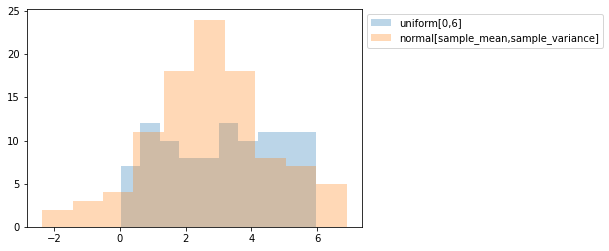

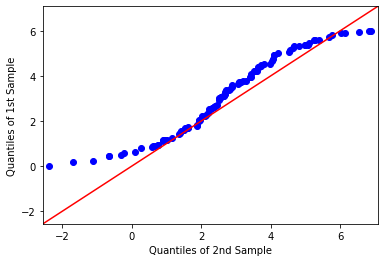

In [25]:
plt.hist(sample_true,alpha=0.3,label='uniform[0,6]')
plt.hist(sample_h0_estimate,alpha=0.3,label='normal[sample_mean,sample_variance]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
pp_x = sm.ProbPlot(sample_true)
pp_y = sm.ProbPlot(sample_h0_estimate)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

### So to control the Type 2 Error, consider another goodness of fit test, the [Lilliefors test](https://en.wikipedia.org/wiki/Lilliefors_test)
- #### The test statistic is same with the **ks_test_normal( )** function desinged above, with "parameter_known" assigne to "no". 
- #### But under the null hypothesis, the test statistic follows the Lilliefors distribution, rather than the Kolmogorov distribution. 
- #### To conduct the test, I use the [statsmodels.stats.diagnostic.lilliefors()function](https://www.statsmodels.org/0.8.0/generated/statsmodels.stats.diagnostic.lilliefors.html)

### The codes below compare a few functions:
- stats.kstest
- ks_test_normal(...,parameter_known='yes')
- ks_test_normal(...,parameter_known='no')
- sm.stats.diagnostic.lilliefors

### Case 1: Null hypothesis is True
### True: X ~ Normal distribution
### H0: X ~ Normal distribution
- #### All the tests give high p-values. 
- #### Note that the test statistics are for ks_test_normal(...,"parameter_known" assigne to "no" ) and the stats.diagnostic.lilliefors() are the same.

In [26]:
sample  = np.random.normal(3,1,50)
compare = pd.DataFrame(columns=['function','ts','p'])
compare['function'] = ['stats.kstest','ks_test_normal_yes','ks_test_normal_no','stats.diagnostic.lilliefors']
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[1,['ts','p']] = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='yes')
compare.loc[2,['ts','p']] = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='no')
compare.loc[3,['ts','p']] = sm.stats.diagnostic.lilliefors(sample,'norm',pvalmethod='table')
compare

,function,ts,p
0,stats.kstest,0.10131,0.646622
1,ks_test_normal_yes,0.10131,0.646622
2,ks_test_normal_no,0.041281,0.999976
3,stats.diagnostic.lilliefors,0.041281,0.99



### Case 2: Null hypothesis is False
### True: X ~ Uniform distribution
### H0: X ~ Normal distribution
- #### Comparing the third and the fourth tests, although the test statistics are identical, the p-value for the Lilliefors test is much smaller than the KS test, because a differnet underlying distribution is used.
- #### This means the Lilliefors test has a better chance to reject this null hypothesis.

In [27]:
sample  = np.random.uniform(0,6,50)
compare = pd.DataFrame(columns=['function','ts','p'])
compare['function'] = ['stats.kstest','ks_test_normal_yes','ks_test_normal_no','stats.diagnostic.lilliefors']
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[0,['ts','p']] = stats.kstest(sample,stats.norm.cdf,args=(3,1))
compare.loc[1,['ts','p']]  = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='yes')
compare.loc[2,['ts','p']]  = ks_test_normal(sample,mu_para=3,sigma2_para=1,parameter_known='no')
compare.loc[3,['ts','p']]  = sm.stats.diagnostic.lilliefors(sample,'norm',pvalmethod='table')
compare

,function,ts,p
0,stats.kstest,0.24031,0.005019
1,ks_test_normal_yes,0.24031,0.005019
2,ks_test_normal_no,0.108512,0.561174
3,stats.diagnostic.lilliefors,0.108512,0.156165


### The following codes conduct experiments of the goodness of fit testing. 
- #### The true (unknown) distribution of X is either Normal(3,1) or Uniform[0,6].
- #### We consider the null hypothesis H0: X~Normal Distribution. 

Mean:3.0495
Variance:2.9872


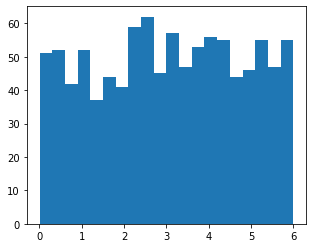

In [28]:
##### Uniform(0,6)
a = 0
b = 6
size = 1000
data = np.random.uniform(a,b,size) 
show_generated_data(data)

Mean:2.9637
Variance:0.9217


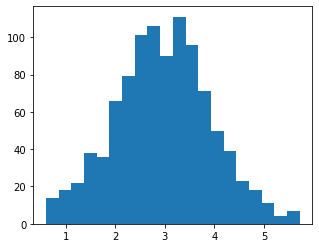

In [29]:
mu             = 3
sigma_squared  = 1
size           = 1000
data = np.random.normal(loc=mu,scale=np.sqrt(sigma_squared),size=size) 
show_generated_data(data)

### In every experiment, we conduct both Kolmogorov-Smirnov and Lilliefors Tests. For the KS test, there are two scenarios: 
- #### (1) we use pre-specified parameters for the Normal distribution, the "parameter_known" = "yes" 
- #### (2) we use estimated parameters for the Normal distribution, the "parameter_known" = "no" 

In [30]:
def ks_experiment(sample_size,n_experiment,true_dist,parameter_known):
    population_size            = 100000
    population_normal          = np.random.normal(3,1,population_size)
    population_uniform         = np.random.uniform(0,6,population_size)
    
    results = pd.DataFrame(columns=['experiment'])
    for e in range(n_experiment):
        results.loc[e,'experiment'] = e+1
        if true_dist=='uniform': 
            sample = np.random.choice(population_uniform,sample_size)
            results.loc[e,'h0'] = 'False'
        if true_dist=='normal': 
            sample = np.random.choice(population_normal,sample_size)
            results.loc[e,'h0'] = 'True'
        ts, p = ks_test_normal(sample,3,1,parameter_known)
        results.loc[e,'ts'] = ts
        results.loc[e,'p']  = p
        results.loc[e,'reject'] = int(p<0.05)
    if true_dist=='normal':
        results['error'] = results['reject']
    else:
        results['error'] = 1-results['reject']
    results['sample_size'] =  sample_size
    return results

In [31]:
def Lilliefors_experiment(sample_size,n_experiment,true_dist):
    population_size            = 100000
    population_normal          = np.random.normal(3,1,population_size)
    population_uniform         = np.random.uniform(0,6,population_size)
    
    results = pd.DataFrame(columns=['experiment'])
    for e in range(n_experiment):
        results.loc[e,'experiment'] = e+1
        if true_dist=='uniform': 
            sample = np.random.choice(population_uniform,sample_size)
            results.loc[e,'h0'] = 'False'
        if true_dist=='normal': 
            sample = np.random.choice(population_normal,sample_size)
            results.loc[e,'h0'] = 'True'
        ts, p = sm.stats.diagnostic.lilliefors(sample,'norm',pvalmethod='table')
        results.loc[e,'ts'] = ts
        results.loc[e,'p']  = p
        results.loc[e,'reject'] = int(p<0.05)
    if true_dist=='normal':
        results['error'] = results['reject']
    else:
        results['error'] = 1-results['reject']
    results['sample_size'] =  sample_size
    return results

### Example (1): 
- #### The true underlying distribution is Normal (3,1). I.e., the null hypothesis is true.
- #### Use pre-specified parameter, i.e., H0: Normal(3,1)

100%|█████████████████████████████████████████████| 5/5 [01:56<00:00, 23.20s/it]


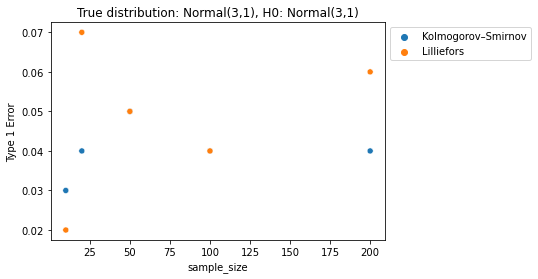

In [32]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in tqdm(sample_size_list):
    result_ks_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,
                                  true_dist='normal',parameter_known='yes')
    result_l_now  = Lilliefors_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='normal')
    if ss==sample_size_list[0]:
        results_ks = result_ks_now
        results_l  = result_l_now
    else:
        results_ks = pd.concat([results_ks,result_ks_now],axis=0)
        results_l  = pd.concat([results_l,result_l_now],axis=0)
        
results_ks['method'] = 'Kolmogorov–Smirnov'
results_l['method']  = 'Lilliefors'
results              = pd.concat([results_ks,results_l],axis=0)
results_sum          = results.groupby(['sample_size','method'])['error'].mean().reset_index()
results_sum          = results_sum.rename(columns={'error':'Type 1 Error'})

sns.scatterplot(data=results_sum,x='sample_size',y='Type 1 Error',hue='method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('True distribution: Normal(3,1), H0: Normal(3,1)')
plt.show()

**Both tests have low p-values.**

### Example (2): 
- #### The true underlying distribution is Normal (3,1). I.e., the null hypothesis is true.
- #### Use estimated parameters, i.e., H0: Normal(mu_para,sigma2_para)

100%|█████████████████████████████████████████████| 5/5 [01:27<00:00, 17.50s/it]


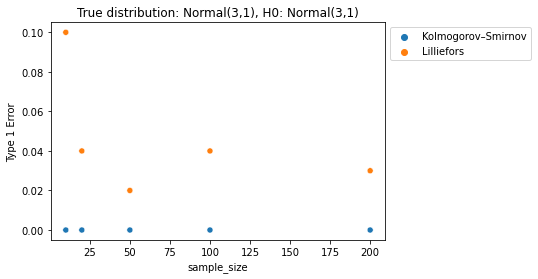

In [33]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in tqdm(sample_size_list):
    result_ks_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,
                                  true_dist='normal',parameter_known='no')
    result_l_now  = Lilliefors_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='normal')
    if ss==sample_size_list[0]:
        results_ks = result_ks_now
        results_l  = result_l_now
    else:
        results_ks = pd.concat([results_ks,result_ks_now],axis=0)
        results_l  = pd.concat([results_l,result_l_now],axis=0)
        
results_ks['method'] = 'Kolmogorov–Smirnov'
results_l['method']  = 'Lilliefors'
results              = pd.concat([results_ks,results_l],axis=0)
results_sum          = results.groupby(['sample_size','method'])['error'].mean().reset_index()
results_sum          = results_sum.rename(columns={'error':'Type 1 Error'})

sns.scatterplot(data=results_sum,x='sample_size',y='Type 1 Error',hue='method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('True distribution: Normal(3,1), H0: Normal(3,1)')
plt.show()

**Both tests have low p-values.**

### Example (3): 
- #### The true underlying distribution is Uniform (0,6). I.e., the null hypothesis is false.
- #### Use pre-specified parameters, i.e., H0: Normal(3,1)

100%|█████████████████████████████████████████████| 5/5 [01:28<00:00, 17.62s/it]


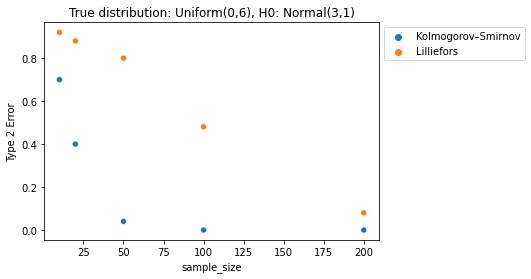

In [34]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in tqdm(sample_size_list):
    result_ks_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,
                                  true_dist='uniform',parameter_known='yes')
    result_l_now  = Lilliefors_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='uniform')
    if ss==sample_size_list[0]:
        results_ks = result_ks_now
        results_l  = result_l_now
    else:
        results_ks = pd.concat([results_ks,result_ks_now],axis=0)
        results_l  = pd.concat([results_l,result_l_now],axis=0)
        
results_ks['method'] = 'Kolmogorov–Smirnov'
results_l['method']  = 'Lilliefors'
results              = pd.concat([results_ks,results_l],axis=0)
results_sum          = results.groupby(['sample_size','method'])['error'].mean().reset_index()
results_sum          = results_sum.rename(columns={'error':'Type 2 Error'})

sns.scatterplot(data=results_sum,x='sample_size',y='Type 2 Error',hue='method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('True distribution: Uniform(0,6), H0: Normal(3,1)')
plt.show()

**The Lilliefors tests have lower p-values.**

### Example (4): 
- #### The true underlying distribution is Uniform (0,6). I.e., the null hypothesis is false.
- #### Use estimated parameters, i.e., H0: Normal(mu_para,sigma2_para)

100%|█████████████████████████████████████████████| 5/5 [01:28<00:00, 17.71s/it]


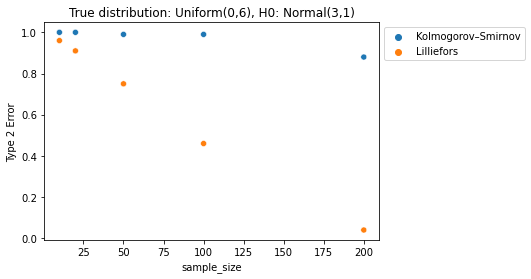

In [35]:
sample_size_list = [10,20,50,100,200]
n_experiment     = 100
for ss in tqdm(sample_size_list):
    result_ks_now = ks_experiment(sample_size=ss,n_experiment=n_experiment,
                                  true_dist='uniform',parameter_known='no')
    result_l_now  = Lilliefors_experiment(sample_size=ss,n_experiment=n_experiment,true_dist='uniform')
    if ss==sample_size_list[0]:
        results_ks = result_ks_now
        results_l  = result_l_now
    else:
        results_ks = pd.concat([results_ks,result_ks_now],axis=0)
        results_l  = pd.concat([results_l,result_l_now],axis=0)
        
results_ks['method'] = 'Kolmogorov–Smirnov'
results_l['method']  = 'Lilliefors'
results              = pd.concat([results_ks,results_l],axis=0)
results_sum          = results.groupby(['sample_size','method'])['error'].mean().reset_index()
results_sum          = results_sum.rename(columns={'error':'Type 2 Error'})

sns.scatterplot(data=results_sum,x='sample_size',y='Type 2 Error',hue='method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('True distribution: Uniform(0,6), H0: Normal(3,1)')
plt.show()

**The Lilliefors tests have lower p-values.**